In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import uniform, norm, expon

Branch banks must keep enough money on hand to satisfy customers' cash demands.  An armored truck delivers cash to the bank once a week.  The bank manager can choose the amount of weekly cash to have delivered.  Running out of cash during the week is terrible customer service and the manager wants to avoid this.  On the other hand, keeping excessive cash reserves costs the bank profits, since cash is a non-interest earning asset.  

The daily demand for cash at this particular bank follows a normal distribution with daily means and std dev summarized in Table 1.

**Table 1**

|                   |Monday|Tuesday|Wednesday|Thursday|Friday|Saturday|Sunday|
|:-----------------:|:----:|:-----:|:-------:|:------:|:----:|:------:|:----:|
|Mean (\\$1,000s)   |175   |120    |90       |60      |120   |140     |65    |
|Std Dev (\\$1,000s)|26    |18     |13       |9       |18    |21      |9     |  

  
  
  
a.  Suppose the bank manager starts the week with \\$825,000.  Create a model for daily ending balance and use 10,000 simluations to determine the probability of the bank running out of money at some point during the week.


b.  Estimate the amount of money needed at the start of the week to ensure that there is at most a 2.0\% probability of running out of money.


In [4]:
means = [175, 120, 90, 60, 120, 140, 65]
sds = [26, 18, 13, 9, 18, 21, 9]

sds

[26, 18, 13, 9, 18, 21, 9]

In [5]:
means[0]

175

In [9]:
## Simulation model for Cash Balance

begin_cash = 825
num_days = 7

Balance = pd.DataFrame(columns = ["Begin","Demand","End"])

for i in np.arange(1, num_days + 1):
    if(i == 1):
        Balance.loc[i, "Begin"] = begin_cash
    else:
        Balance.loc[i, 'Begin'] = Balance.loc[i-1, 'End']
    
    Balance.loc[i, 'Demand'] = norm.rvs(size = 1, loc = means[i-1], scale = sds[i-1]).item()
    Balance.loc[i, 'End'] = Balance.loc[i, 'Begin'] - Balance.loc[i, 'Demand']

Balance = Balance.set_axis(['Day_' + str(n) for n in np.arange(1, num_days + 1)])
Balance

,Begin,Demand,End
Day_1,825,218.628008,606.371992
Day_2,606.371992,104.81502,501.556972
Day_3,501.556972,81.804195,419.752777
Day_4,419.752777,54.531768,365.221008
Day_5,365.221008,137.597891,227.623118
Day_6,227.623118,147.872267,79.750851
Day_7,79.750851,58.666419,21.084432


In [40]:
## Simulation Trials

begin_cash = 825
num_days = 7
means = [175, 120, 90, 60, 120, 140, 65]
sds = [26, 18, 13, 9, 18, 21, 9]

num_trials = 10000

Cash = pd.DataFrame(columns = ['Day_' + str(n) for n in np.arange(0, num_days + 1)])

for t in np.arange(1, num_trials + 1) :
    Cash_day = [begin_cash]
    for d in np.arange(1, num_days + 1) :
        Cash_day.append(Cash_day[d-1] - norm.rvs(size = 1, loc = means[d-1], scale = sds[d-1]).item())
        
    Cash.loc[t] = Cash_day

Cash

,Day_0,Day_1,Day_2,Day_3,Day_4,Day_5,Day_6,Day_7
1,825.0,674.543620,561.368545,467.771075,410.543895,273.375920,165.343390,99.066824
2,825.0,648.119292,513.491150,411.949962,352.885859,252.256247,101.784626,45.523917
3,825.0,636.313225,499.261390,415.564429,355.769703,234.851982,102.962979,28.244217
4,825.0,669.727105,550.556821,481.314814,419.157782,274.292236,140.355562,78.031031
5,825.0,612.303737,517.170268,439.819901,387.892357,244.137188,85.341241,26.902599
...,...,...,...,...,...,...,...,...
9996,825.0,654.654737,552.825790,450.707515,373.890290,243.485104,101.577047,25.395867
9997,825.0,625.222498,488.419985,404.556050,338.197378,188.920237,31.602582,-36.396736
9998,825.0,611.585755,466.028575,402.399781,342.227980,187.532400,44.104378,-23.145177
9999,825.0,591.762826,433.053313,350.582142,297.668292,179.165163,65.274936,12.410607


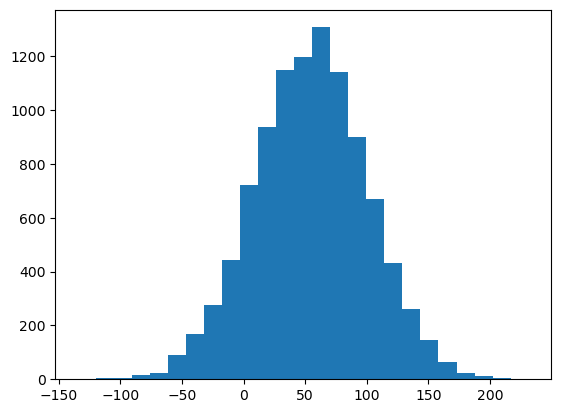

In [15]:
plt.hist(Cash['Day_7'], bins = 25)
plt.show()

In [41]:
sum(Cash["Day_7"]<0)/len(Cash["Day_7"])

0.1156

a.  Suppose the bank manager starts the week with \\$825,000.  Create a model for daily ending balance and use 10,000 simluations to determine the probability of the bank running out of money at some point during the week.

Answer Here_11.56%_

In [42]:
## Balance What-If

num_days = 7
means = [175, 120, 90, 60, 120, 140, 65]
sds = [26, 18, 13, 9, 18, 21, 9]

num_trials = 10000

cash_range = np.arange(825, 1000, 10)
SimOutput = pd.DataFrame(columns = ['Prob_Out_Of_Money'], index = cash_range)
for k in cash_range :
    Cash = pd.DataFrame(columns = ['Day_' + str(n) for n in np.arange(0, num_days + 1)])
    
    for t in np.arange(1, num_trials + 1) :
        Cash_day = [k]
        for d in np.arange(1, num_days + 1) :
            Cash_day.append(Cash_day[d-1] - norm.rvs(size = 1, loc = means[d-1], scale = sds[d-1]).item())
        
        Cash.loc[t] = Cash_day

    SimOutput.loc[k,'Prob_Out_Of_Money'] = sum(Cash["Day_7"]<0)/len(Cash["Day_7"])

In [43]:
SimOutput

,Prob_Out_Of_Money
825,0.1139
835,0.0758
845,0.0487
855,0.0301
865,0.0202
875,0.0116
885,0.0052
895,0.0031
905,0.001
915,0.0009


In [46]:
cash_range = np.arange(865, 875, 1)
SimOutput = pd.DataFrame(columns = ['Prob_Out_Of_Money'], index = cash_range)
for k in cash_range :
    Cash = pd.DataFrame(columns = ['Day_' + str(n) for n in np.arange(0, num_days + 1)])
    
    for t in np.arange(1, num_trials + 1) :
        Cash_day = [k]
        for d in np.arange(1, num_days + 1) :
            Cash_day.append(Cash_day[d-1] - norm.rvs(size = 1, loc = means[d-1], scale = sds[d-1]).item())
        
        Cash.loc[t] = Cash_day

    SimOutput.loc[k,'Prob_Out_Of_Money'] = sum(Cash["Day_7"]<0)/len(Cash["Day_7"])
SimOutput

,Prob_Out_Of_Money
865,0.0206
866,0.0196
867,0.0164
868,0.0168
869,0.013
870,0.0142
871,0.0144
872,0.0138
873,0.0122
874,0.0113


b. Estimate the amount of money needed at the start of the week to ensure that there is at most a 2.0% probability of running out of money.

Answer Here__$866,000___